### 香农熵的代码实现

In [1]:
def calEnt(dataSet):
    n = dataSet.shape[0]   # 样本量
    iset = dataSet.iloc[:,-1].value_counts()   # 按标签类别计数
    p = iset/n    # 不同类别的概率
    ent = (-p*np.log2(p)).sum()   # 信息熵公式
    return ent

In [2]:
 # 创建数据集
import numpy as np 
import pandas as pd

def createDataSet():
    row_data = {'accompany':[0,0,0,1,1],
             'game':[1,1,0,1,1],
             'bad boy':['yes','yes','no','no','no']}
    dataSet = pd.DataFrame(row_data)
    return dataSet

In [3]:
dataSet = createDataSet()
dataSet

,accompany,game,bad boy
0,0,1,yes
1,0,1,yes
2,0,0,no
3,1,1,no
4,1,1,no


In [4]:
 calEnt(dataSet)

0.9709505944546686

#### 信息增益

In [5]:
a=(3/5)*(-(2/3)*np.log2(2/3)-(1/3)*np.log2(1/3))
calEnt(dataSet)-a

0.4199730940219749

In [6]:
a=(4/5)*(-(2/4)*np.log2(2/4)-(2/4)*np.log2(2/4))
calEnt(dataSet)-a

0.17095059445466854

#### 划分数据集

In [5]:
# 选择最优的列进行切分
def bestSplit(dataSet):
    baseEnt = calEnt(dataSet)                                # 计算原始熵
    bestGain = 0                                             # 初始化信息增益
    axis = -1                                                # 初始化最佳切分列，标签列
    for i in range(dataSet.shape[1]-1):                      # 对特征的每一列进行循环
        levels= dataSet.iloc[:,i].value_counts().index       # 提取出当前列的所有取值
        ents = 0                                             # 初始化子节点的信息熵
        for j in levels:                                     # 对当前列的每一个取值进行循环
            childSet = dataSet[dataSet.iloc[:,i]==j]         # 某一个子节点的dataframe
            ent = calEnt(childSet)                           # 计算某一个子节点的信息熵
            ents += (childSet.shape[0]/dataSet.shape[0])*ent # 计算当前列的信息熵
            print(f'第{i}列的信息熵为{ents}')
        infoGain = baseEnt-ents                              # 计算当前列的信息增益
        print(f'第{i}列的信息增益为{infoGain}')
        if (infoGain > bestGain):
            bestGain = infoGain                              # 选择最大信息增益
            axis = i                                         # 最大信息增益所在列的索引
    return axis

In [6]:
bestSplit(dataSet)

第0列的信息熵为0.5509775004326937
第0列的信息熵为0.5509775004326937
第0列的信息增益为0.4199730940219749
第1列的信息熵为0.8
第1列的信息熵为0.8
第1列的信息增益为0.17095059445466854


0

In [7]:
def mySplit(dataSet,axis,value):
    col = dataSet.columns[axis]
    redataSet = dataSet.loc[dataSet[col]==value,:].drop(col,axis=1)
    return redataSet

In [12]:
mySplit(dataSet,0,0)

,game,bad boy
0,1,yes
1,1,yes
2,0,no


### ID3算法

In [13]:
def createTree(dataSet):
    featlist = list(dataSet.columns)                        # 提取出数据集所有的列
    classlist = dataSet.iloc[:,-1].value_counts()           # 获取最后一列类标签
    # 判断最多标签数目是否等于数据集行数，或者数据集是否只有一列
    if classlist[0]==dataSet.shape[0] or dataSet.shape[1] == 1:
        return classlist.index[0]                           # 如果是，返回类标签
    axis = bestSplit(dataSet)                               # 确定出当前最佳切分列的索引
    bestfeat = featlist[axis]                               # 获取该索引对应的特征
    myTree = {bestfeat:{}}                                  # 采用字典嵌套的方式存储树信息
    del featlist[axis]                                      # 删除当前特征
    valuelist = set(dataSet.iloc[:,axis])                   # 提取最佳切分列所有属性值
    for value in valuelist:                                 # 对每一个属性值递归建树
        myTree[bestfeat][value] = createTree(mySplit(dataSet,axis,value))
    return myTree

In [14]:
myTree = createTree(dataSet)
myTree

第0列的信息熵为0.5509775004326937
第0列的信息熵为0.5509775004326937
第0列的信息增益为0.4199730940219749
第1列的信息熵为0.8
第1列的信息熵为0.8
第1列的信息增益为0.17095059445466854
第0列的信息熵为0.0
第0列的信息熵为0.0
第0列的信息增益为0.9182958340544896


{'accompany': {0: {'game': {0: 'no', 1: 'yes'}}, 1: 'no'}}

### sklearn实现决策树分类

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [16]:
wine = load_wine()

In [17]:
wine.data.shape

(178, 13)

In [18]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [19]:
#如果wine是一张表，应该长这样：
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [20]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [21]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [23]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3,
                                                random_state=420)

In [24]:
Xtrain.shape

(124, 13)

In [25]:
Xtest.shape

(54, 13)

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# clf = DecisionTreeClssifier()

In [84]:
clf = tree.DecisionTreeClassifier(criterion='gini')
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest) #返回预测的准确度
score

0.9444444444444444

In [86]:
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']

In [30]:
#特征重要性
clf.feature_importances_

array([0.        , 0.02195225, 0.        , 0.        , 0.        ,
       0.        , 0.39557682, 0.        , 0.        , 0.39720941,
       0.02404637, 0.        , 0.16121515])

In [90]:
[*zip(feature_name,clf.feature_importances_)]

[('酒精', 0.02195224501537985),
 ('苹果酸', 0.0),
 ('灰', 0.0),
 ('灰的碱性', 0.024046373651715403),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.3955768217709794),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.39720941385141617),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.16121514571050916)]

In [32]:
clf.tree_.node_count   # 树的结点个数

13

/Users/mac/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


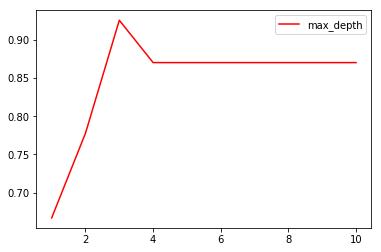

In [101]:
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                      ,criterion="entropy"
                                      ,random_state=30
                                      ,splitter="random"
                                     )
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    test.append(score)
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()

### 样本不平衡

In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs

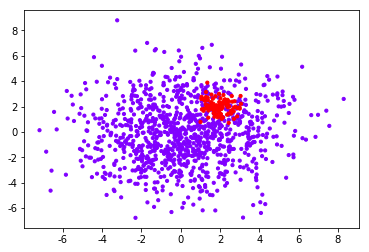

In [103]:
class_1 = 1000 #类别1有1000个样本
class_2 = 100 #类别2只有100个
centers = [[0,0], [2.0, 2.0]] #设定两个类别的中心
clusters_std = [2.5, 0.5] #设定两个类别的方差，通常来说，样本量比较大的类别会更加松散
X, y = make_blobs(n_samples=[class_1, class_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=420,shuffle=False)

#看看数据集长什么样
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow",s=10);
#其中红色点是少数类，紫色点是多数类

In [104]:
# 划分数据集
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.2,random_state=420)

In [105]:
#不设定class_weight
clf = DecisionTreeClassifier()
clf.fit(Xtrain, Ytrain)
clf.predict(Xtest)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [106]:
clf.score(Xtest,Ytest)  # 错觉！

0.9

In [110]:
#设定class_weight
wclf = DecisionTreeClassifier(class_weight='balanced')   # balance按照原始标签的权重进行平衡
wclf.fit(Xtrain, Ytrain)
wclf.predict(Xtest)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [134]:
#设定class_weight
wclf = DecisionTreeClassifier(class_weight={1:50}) 
wclf.fit(Xtrain, Ytrain)

DecisionTreeClassifier(class_weight={1: 50}, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [135]:
#给两个模型分别打分看看，这个分数是accuracy准确度
clf.score(Xtest,Ytest)

0.9

In [136]:
wclf.score(Xtest,Ytest)

0.9090909090909091

### 混淆矩阵

#### Precision

In [113]:
#所有判断正确并确实为1的样本 / 所有被判断为1的样本
#对于没有class_weight的决策树来说：
Precision_1 = (Ytest[Ytest == clf.predict(Xtest)] == 1).sum()/(clf.predict(Xtest) == 1).sum()
Precision_1

0.6666666666666666

In [137]:
#对于有class_weight的决策树来说：
Precision_2 = (Ytest[Ytest == wclf.predict(Xtest)] == 1).sum()/(wclf.predict(Xtest) == 1).sum()
Precision_2

0.6666666666666666

#### Recall

In [115]:
#所有predict为1并且正确的点 / 全部为1的点的比例
#对于没有class_weight的决策树来说：
Recall_1 = (Ytest[Ytest == clf.predict(Xtest)] == 1).sum()/(Ytest == 1).sum()
Recall_1

0.4827586206896552

In [138]:
#对于有class_weight的决策树来说：
Recall_2 = (Ytest[Ytest == wclf.predict(Xtest)] == 1).sum()/(Ytest == 1).sum()
Recall_2

0.6206896551724138

#### F-measure

In [117]:
F_1 = 2*Precision_1*Recall_1/(Precision_1+Recall_1)
F_1

0.56

In [133]:
#对于有class_weight的决策树来说：
F_2 = 2*Precision_2*Recall_2/(Precision_2+Recall_2)
F_2

0.6428571428571429

#### scikit-learn混淆矩阵库

In [121]:
from sklearn import metrics

In [122]:
# Precision
metrics.precision_score(Ytest,wclf.predict(Xtest))

0.6538461538461539

In [123]:
# Recall
metrics.recall_score(Ytest,wclf.predict(Xtest))

0.5862068965517241

In [124]:
# F-measure
metrics.f1_score(Ytest,wclf.predict(Xtest))

0.6181818181818182

In [139]:
metrics.confusion_matrix(Ytest,wclf.predict(Xtest))

array([[182,   9],
       [ 11,  18]])

In [141]:
metrics.confusion_matrix(Ytest,clf.predict(Xtest))

array([[184,   7],
       [ 15,  14]])

### 网格搜索

In [142]:
wclf.score(Xtest,Ytest)

0.9090909090909091

In [143]:
from sklearn.model_selection import GridSearchCV

In [144]:
# 设置需要调整的参数范围（参数网格）
param_grid = {'criterion':['entropy','gini'],
             'max_depth':range(2,10),
             'min_samples_leaf':range(1,10),
             'min_samples_split':range(2,30,2)}

# 设置网格
GR  = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)

# 建模
GR.fit(Xtrain,Ytrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(2, 10),
                         

In [145]:
# 输出接口
GR.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 10}

In [146]:
GR.best_score_

0.9534090909090909